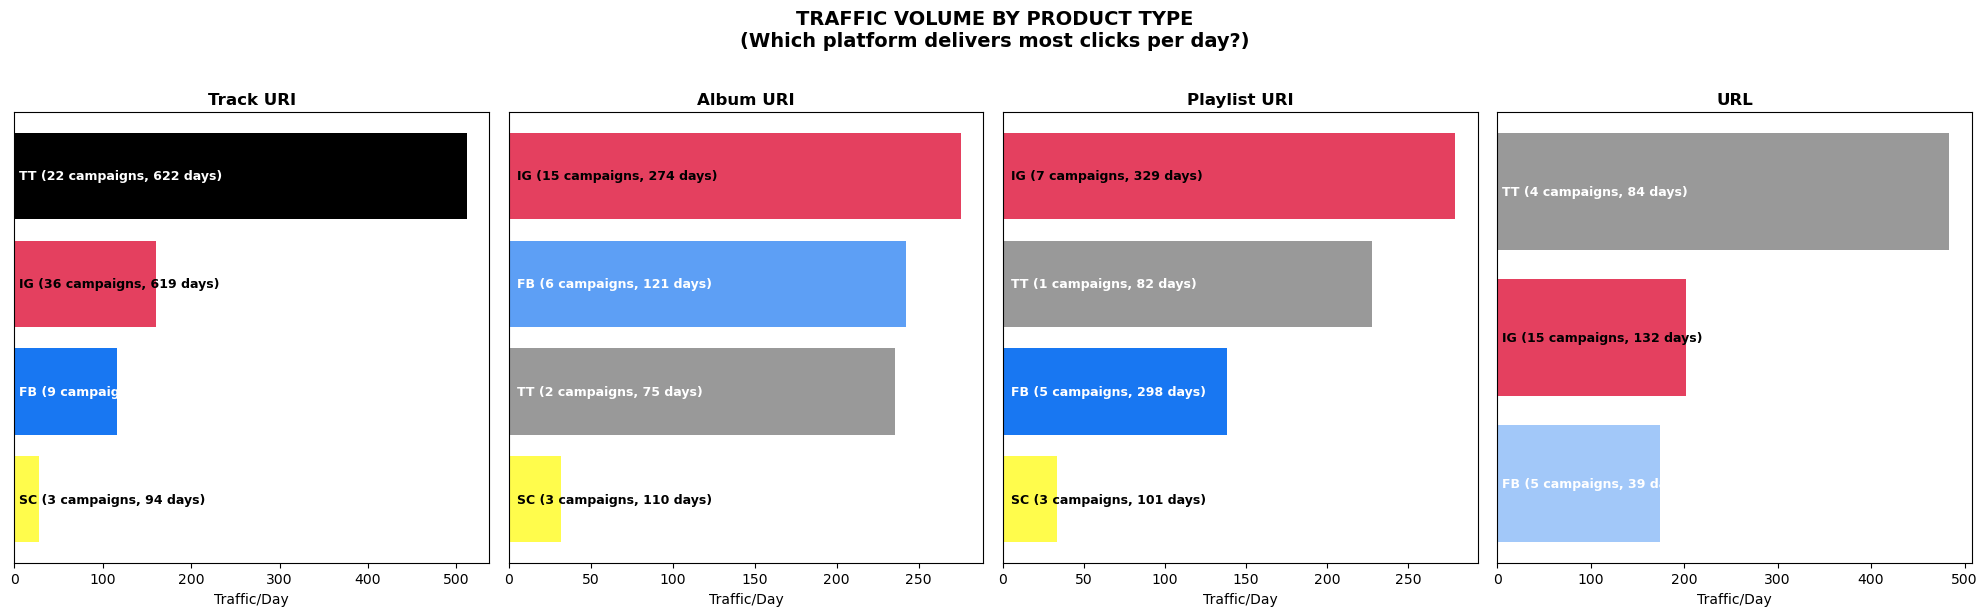

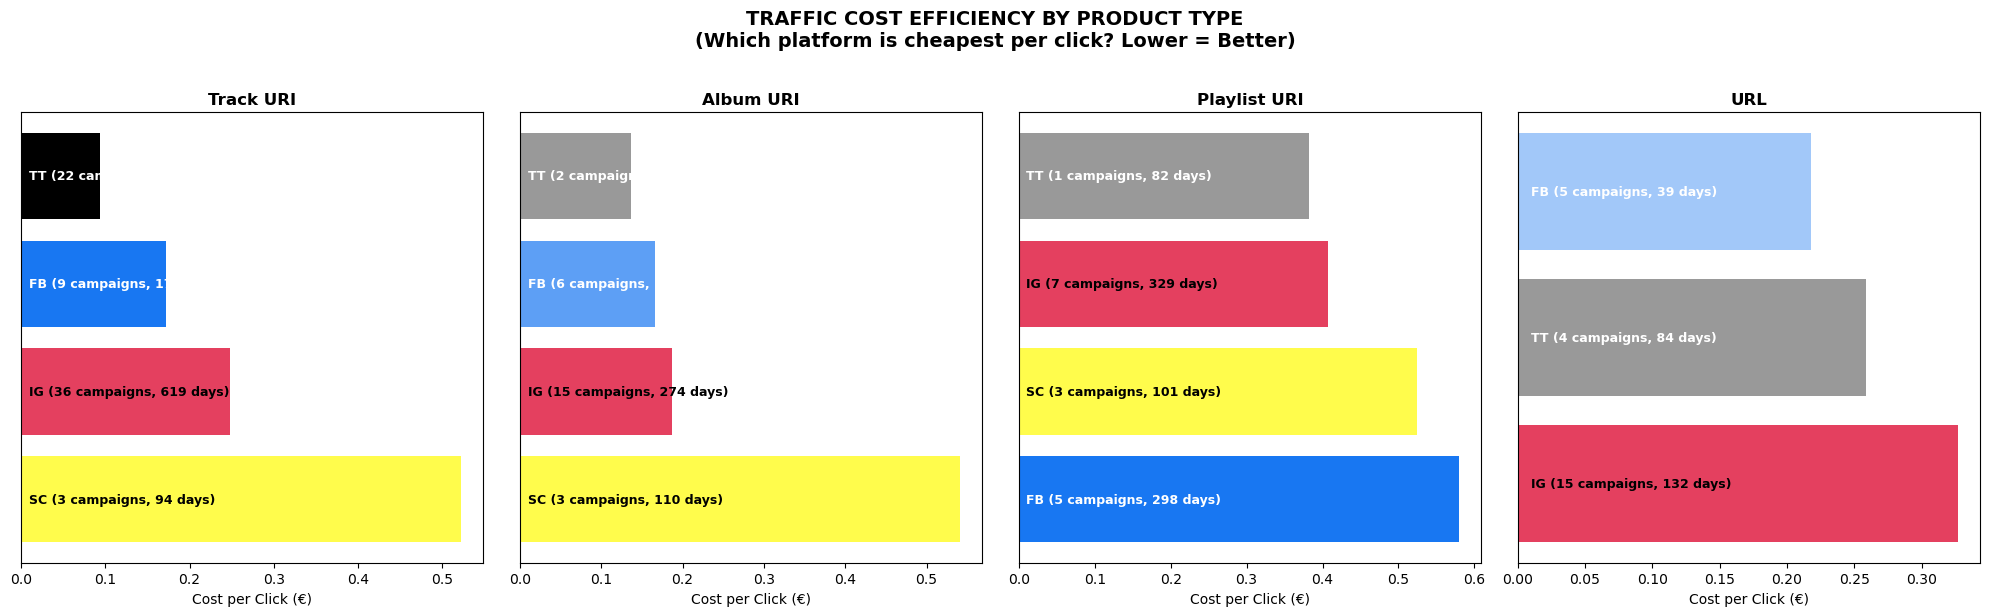

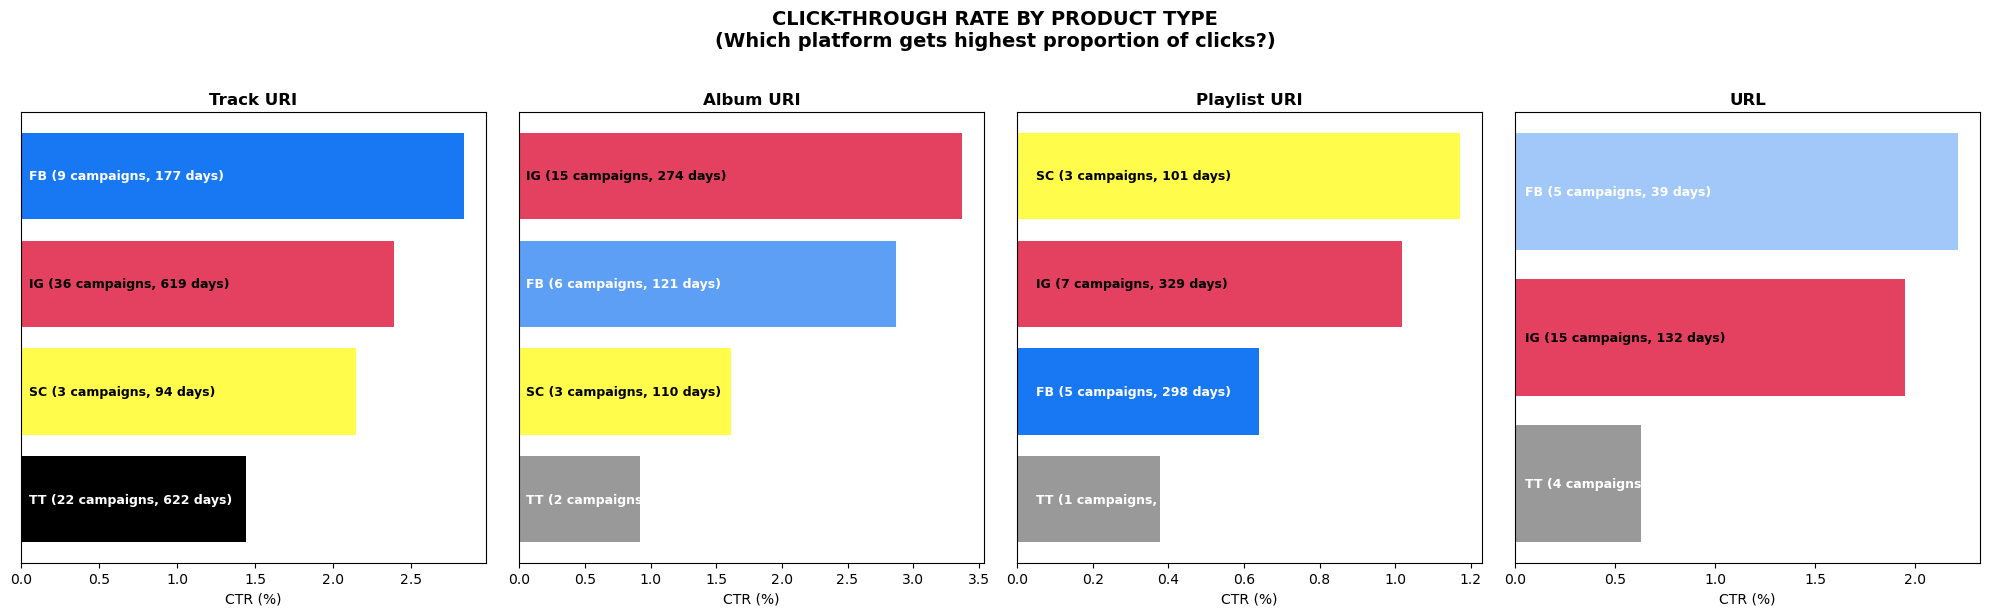

In [1]:
# ============================================
# Traffic Performance by Product Type
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba

# Load data
df = pd.read_csv('platform_objective_summary_truly_deepy_really_final.csv')

# Platform colors
platform_colors_base = {
    'facebook': '#1877F2',
    'google': '#4285F4',
    'instagram': '#E4405F',
    'snapchat': '#FFFC00',
    'tiktok': '#000000',
    'youtube': '#FF0000'
}

confidence_alpha = {
    'A_reliable': 1.0,
    'B_indicative': 0.7,
    'C_exploratory': 0.4
}

def get_color_with_confidence(platform, confidence):
    base_color = platform_colors_base[platform]
    alpha = confidence_alpha[confidence]
    return to_rgba(base_color, alpha=alpha)

# Filter to traffic objectives only
df_traffic = df[df['objective'] == 'traffic'].copy()

# Create labels
df_traffic['platform_short'] = df_traffic['platform_category'].map({
    'facebook': 'FB', 'instagram': 'IG', 'snapchat': 'SC', 'tiktok': 'TT'
})
df_traffic['bar_label'] = df_traffic.apply(
    lambda row: f"{row['platform_short']} ({int(row['campaign_count'])} campaigns, {int(row['total_campaign_duration_days'])} days)", 
    axis=1
)
df_traffic['color'] = df_traffic.apply(
    lambda row: get_color_with_confidence(row['platform_category'], row['confidence_tier']), axis=1
)

product_types = ['Track URI', 'Album URI', 'Playlist URI', 'URL']

# ============================================
# Chart 1: Traffic Volume (traffic_per_day)
# ============================================

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False)

for i, product in enumerate(product_types):
    df_prod = df_traffic[df_traffic['product_number_type'] == product].sort_values('traffic_per_day', ascending=True)
    
    if len(df_prod) == 0:
        axes[i].set_title(f'{product}\n(no data)')
        continue
    
    bars = axes[i].barh(range(len(df_prod)), df_prod['traffic_per_day'], color=df_prod['color'].tolist())
    
    for j, (idx, row) in enumerate(df_prod.iterrows()):
        text_color = 'white' if row['platform_category'] in ['tiktok', 'facebook'] else 'black'
        axes[i].text(5, j, row['bar_label'], 
                    va='center', ha='left', fontsize=9, fontweight='bold', color=text_color)
    
    axes[i].set_title(f'{product}', fontweight='bold')
    axes[i].set_xlabel('Traffic/Day')
    axes[i].set_yticks([])

plt.suptitle('TRAFFIC VOLUME BY PRODUCT TYPE\n(Which platform delivers most clicks per day?)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================
# Chart 2: Cost Efficiency (cost_per_click)
# ============================================

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False)

for i, product in enumerate(product_types):
    df_prod = df_traffic[
        (df_traffic['product_number_type'] == product) & 
        (df_traffic['cost_per_click'].notna()) & 
        (df_traffic['cost_per_click'] > 0)
    ].sort_values('cost_per_click', ascending=False)  # Reversed: lowest (best) at top
    
    if len(df_prod) == 0:
        axes[i].set_title(f'{product}\n(no data)')
        continue
    
    bars = axes[i].barh(range(len(df_prod)), df_prod['cost_per_click'], color=df_prod['color'].tolist())
    
    for j, (idx, row) in enumerate(df_prod.iterrows()):
        text_color = 'white' if row['platform_category'] in ['tiktok', 'facebook'] else 'black'
        axes[i].text(0.01, j, row['bar_label'], 
                    va='center', ha='left', fontsize=9, fontweight='bold', color=text_color)
    
    axes[i].set_title(f'{product}', fontweight='bold')
    axes[i].set_xlabel('Cost per Click (€)')
    axes[i].set_yticks([])

plt.suptitle('TRAFFIC COST EFFICIENCY BY PRODUCT TYPE\n(Which platform is cheapest per click?)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================
# Chart 3: Click-Through Rate
# ============================================

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False)

for i, product in enumerate(product_types):
    df_prod = df_traffic[
        (df_traffic['product_number_type'] == product) & 
        (df_traffic['click_through_rate_pct'].notna())
    ].sort_values('click_through_rate_pct', ascending=True)
    
    if len(df_prod) == 0:
        axes[i].set_title(f'{product}\n(no data)')
        continue
    
    bars = axes[i].barh(range(len(df_prod)), df_prod['click_through_rate_pct'], color=df_prod['color'].tolist())
    
    for j, (idx, row) in enumerate(df_prod.iterrows()):
        text_color = 'white' if row['platform_category'] in ['tiktok', 'facebook'] else 'black'
        axes[i].text(0.05, j, row['bar_label'], 
                    va='center', ha='left', fontsize=9, fontweight='bold', color=text_color)
    
    axes[i].set_title(f'{product}', fontweight='bold')
    axes[i].set_xlabel('CTR (%)')
    axes[i].set_yticks([])

plt.suptitle('CLICK-THROUGH RATE BY PRODUCT TYPE\n(Which platform gets highest proportion of clicks?)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


####  Recommendations

##### Track : TikTok delivers impressive volume at the lowest cost,  but its click-through rate is the weakest. Facebook, despite fewer campaigns, shows the highest CTR with solid volume (compared to Instagram, not volume-king TikTok)  and slightly better cost efficiency than Instagram. Consider shifting some TikTok budget to Facebook to balance reach with intent.

##### Album : Instagram and Facebook are pulling their weight here - good volume, reasonable costs. Snapchat is the outlier: 110 days of campaigns yielding the lowest volume, highest cost per click, and mediocre CTR. Snapchat’s budget would work harder on Facebook.

##### Playlist: Instagram leads on volume with decent efficiency. Snapchat again underperforms - high cost, low volume, and while it has the best CTR, that doesn't compensate. TikTok shows promise on cost and volume despite low CTR; worth testing with a small budget increase. Recommendation: reduce Snapchat, maintain Instagram, experiment with TikTok.

##### URL: Facebook shows an interesting signal: lowest cost per click and highest CTR, but limited data (39 days). TikTok has volume but very low engagement. Worth expanding Facebook testing to see if these early results hold.

##### *Note: These findings reflect Q1 campaign data and don't account for audience demographics or content type, which may justify platform choices not captured here.*